# Coursework

## Question 1

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist #to import our dataset
from tensorflow.keras.models import Sequential, Model # imports our type of network
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout # imports our layers we want to use

from tensorflow.python.keras.losses import categorical_crossentropy #loss function
from tensorflow.keras.optimizers import Adam, SGD #optimisers
from tensorflow.keras.utils import to_categorical #some function for data preparation

In [66]:
batch_size = 128
num_classes = 19
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [67]:
images = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((y_train, y_test), axis=0)

np.random.seed(73289)

In [68]:
def create_combined_dataset(iamges, labels, dataset_size=10000):
    combined_images = []
    combined_labels = []
    
    for _ in range(dataset_size):
        idx1, idx2 = np.random.choice(np.arange(len(images)), 2, replace=True)
        img1, img2 = images[idx1], images[idx2]
        label1, label2 = labels[idx1], labels[idx2]
        
        combined_image = np.vstack((img1, img2))
        combined_label = label1 + label2
        
        combined_images.append(combined_image)
        combined_labels.append(combined_label)
        
    combined_images = np.array(combined_images).reshape(-1, 56, 28, 1)
    combined_labels = np.array(combined_labels)
    
    return combined_images, combined_labels

In [69]:
dataset_size = 20000
train_size = int(0.7 * dataset_size)
val_size = int(0.1 * dataset_size)
test_size = dataset_size - train_size - val_size

print("Train size: ", train_size)
print("Validation size: ", val_size)
print("Test size: ", test_size)

Train size:  14000
Validation size:  2000
Test size:  4000


In [70]:
combined_images, combined_labels = create_combined_dataset(images, labels, dataset_size)

(56, 28, 1)
11


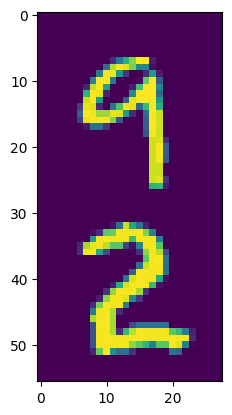

In [71]:
print(combined_images[0].shape)
print(combined_labels[0])
plt.imshow(combined_images[0])

In [72]:
# Split dataset
train_images, train_labels = combined_images[:train_size], combined_labels[:train_size]
val_images, val_labels = combined_images[train_size:train_size+val_size], combined_labels[train_size:train_size+val_size]
test_images, test_labels = combined_images[train_size+val_size:], combined_labels[train_size+val_size:]

In [73]:
print("Train images shape: ", train_images.shape)
print("Train labels shape: ", train_labels.shape)
print("Validation images shape: ", val_images.shape)
print("Validation labels shape: ", val_labels.shape)
print("Test images shape: ", test_images.shape)
print("Test labels shape: ", test_labels.shape)

Train images shape:  (14000, 56, 28, 1)
Train labels shape:  (14000,)
Validation images shape:  (2000, 56, 28, 1)
Validation labels shape:  (2000,)
Test images shape:  (4000, 56, 28, 1)
Test labels shape:  (4000,)


## Question 2

In [79]:
model = Sequential([
    Input(shape=train_images.shape),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(rate=0.01),
    Dense(256, activation='relu'),
    Dropout(rate=0.01),
    Dense(num_classes, activation='softmax')
])

ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[21952000,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:StatelessRandomUniformV2] name: 

In [75]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error', metrics=['accuracy'])

In [76]:
model.fit(
    test_images, test_labels,
    validation_data=(val_images, val_labels),
    epochs=50,
    batch_size=128)

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/mean_squared_error/sub defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Python312\Lib\asyncio\base_events.py", line 641, in run_forever

  File "c:\Python312\Lib\asyncio\base_events.py", line 1986, in _run_once

  File "c:\Python312\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\JZ\AppData\Local\Temp\ipykernel_2996\3847836219.py", line 1, in <module>

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 320, in fit

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\trainer.py", line 398, in _compute_loss

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\trainer.py", line 366, in compute_loss

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\compile_utils.py", line 618, in __call__

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\compile_utils.py", line 659, in call

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\keras\src\losses\loss.py", line 60, in __call__

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\keras\src\losses\losses.py", line 27, in call

  File "C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\keras\src\losses\losses.py", line 1303, in mean_squared_error

Incompatible shapes: [128] vs. [128,19]
	 [[{{node compile_loss/mean_squared_error/sub}}]] [Op:__inference_one_step_on_iterator_98591]

In [ ]:
test_loss, test_mae = model.evaluate(test_images, test_labels)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8089 - loss: 0.1777


In [71]:
import optuna

In [ ]:
def objective(trial):
    # Suggest values for hyperparameters
    num_units_layer1 = trial.suggest_int("units_layer1", 128, 256, step=32)
    num_units_layer2 = trial.suggest_int("units_layer2", 64, 128, step=16)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step=0.1)
    learning_rate = trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True)
    batch_size = trial.suggest_categorical("batch_size", [8, 16, 32, 64])

    # Build the model
    model = Sequential([
        Input(shape=(56, 28, 1)),
        Flatten(),
        Dense(num_units_layer1, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_units_layer2, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    
    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Train the model
    history = model.fit(
        train_images, train_labels,
        validation_data=(val_images, val_labels),
        epochs=10,  # Use a small number of epochs for tuning
        batch_size=batch_size,
        verbose=0  # Suppress output for faster tuning
    )
    
    # Evaluate the model on validation data
    val_accuracy = history.history['val_accuracy'][-1]  # Last epoch's validation accuracy
    return -val_accuracy


In [79]:
# Create a study and optimize the objective function
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)  # Run 50 trials

best_params = study.best_params
best_accuracy = -study.best_value  # Negate the value to get accuracy
print(f"Best parameters: {best_params}")
print(f"Best validation accuracy: {best_accuracy:.4f}")


[I 2024-11-27 21:45:06,757] A new study created in memory with name: no-name-507d0cf6-71a9-4b24-9068-0e17f2b82f5c
C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(16, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
[I 2024-11-27 21:45:28,804] Trial 0 finished with value: -0.008500000461935997 and parameters: {'units_layer1': 160, 'units_layer2': 80, 'dropout_rate': 0.2, 'learning_rate': 0.0141971229571766, 'batch_size': 16}. Best is trial 0 with value: -0.008500000461935997.
C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider

Best parameters: {'units_layer1': 192, 'units_layer2': 112, 'dropout_rate': 0.1, 'learning_rate': 0.00679556834922299, 'batch_size': 64}
Best validation accuracy: 0.0170


In [81]:

# Get the best parameters
best_params = study.best_params
print(f"Best parameters: {best_params}")

# Build the best model with the optimized parameters
best_model = Sequential([
    Flatten(input_shape=(56, 28, 1)),
    Dense(best_params['units_layer1'], activation='relu'),
    Dropout(best_params['dropout_rate']),
    Dense(best_params['units_layer2'], activation='relu'),
    Dense(1)
])

best_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the best model on the full training set
best_model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=50,
    batch_size=best_params['batch_size']
)

best_model.evaluate(test_images, test_labels)

Best parameters: {'units_layer1': 192, 'units_layer2': 112, 'dropout_rate': 0.1, 'learning_rate': 0.00679556834922299, 'batch_size': 64}
Epoch 1/50


C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\JZ\AppData\Roaming\Python\Python312\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0099 - loss: 1.0656e-06 - val_accuracy: 0.0085 - val_loss: 1.0505e-06
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0106 - loss: 1.0649e-06 - val_accuracy: 0.0085 - val_loss: 1.0505e-06
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0105 - loss: 1.0584e-06 - val_accuracy: 0.0085 - val_loss: 1.0505e-06
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0117 - loss: 1.0626e-06 - val_accuracy: 0.0085 - val_loss: 1.0505e-06
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0106 - loss: 1.0562e-06 - val_accuracy: 0.0085 - val_loss: 1.0505e-06
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0105 - loss: 1.0516e-06 - val_accuracy: 0.0085 - val_loss: 1.0505e-06
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0111 - loss: 1.0671e-06 - val_accuracy: 0.0085 - val_loss: 1.0505e-06
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

[1.056343421623751e-06, 0.013000000268220901]